In [32]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import tensorflow as tf
import keras
import sklearn as sk
import sklearn.utils.multiclass.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


ModuleNotFoundError: No module named 'sklearn.utils.unique_labels'

In [3]:
# import the dataset
df = pd.read_csv('data/data.csv')

In [33]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.


    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



In [4]:

df.head()

,Text,Polarity
0,আমাদের সজাগ থাকতে হবে টিকা নেওয়া নিয়ে।,1
1,ভ্যাকসিন ভালো না।,0
2,আমার পরিবারের সকলেই টিকা নিয়েছে।,1
3,টিকা লক্ষণীয় রোগ প্রতিরোধে একইভাবে উচ্চ কার্য...,1
4,অনলাইনে আবেদন করে আমি ভ্যাকসিন নিয়েছি।,1


In [5]:
train_sentence,test_sentence,train_label,test_label =sk.model_selection. train_test_split(df['Text'].to_numpy(),df['Polarity'].to_numpy(),test_size=0.2,random_state=42)

In [24]:
from utils.utils import visualize_random_sample, build_model, calculate_results, save_model, load_model

In [17]:
visualize_random_sample(df, 'Text', 'Polarity', 10)

Text -> আমি আল্লাহর বান্দা। আমারে তিনিই বাঁচাবেন।
Polarity -> 0
-

Text -> গ্রাম পর্যায়ে টিকা প্রদানে অনেক দুর্নীতি।
Polarity -> 0
-

Text -> শীতে ভ্যাকসিন নিবে গরমের সময় মরবে
Polarity -> 0
-

Text -> আমার বয়স প্রায় ৮০। টিকা দিয়েছি কোনো সমস্যা হচ্ছে না।
Polarity -> 1
-

Text -> টিকা নিয়ে সবাই বিড়ম্বনায় আছে।
Polarity -> 0
-

Text -> টিকা নিয়ে তো কতজনরেই অসুস্থ হয়ে পড়তে দেখলাম।
Polarity -> 0
-

Text -> ভ্যাকসিন কার্ড ছাড়া কোথাও যাওয়া যাবে না। এই বিষয়টিতে আরো নজরদারি দেওয়া উচিত। 
Polarity -> 1
-

Text -> করোনা বলতে কিছু নাই, হুদাই বিজনেস এর ফন্দি।
Polarity -> 0
-

Text -> হাসপাতালে ভর্তির বিরুদ্ধে ভ্যাকসিন কার্যকারিতা ছিল ৭৯%।
Polarity -> 1
-

Text -> টীকা নেয়া হারাম।
Polarity -> 0
-



Confusion matrix, without normalization
[[208 158]
 [ 87 309]]


{'accuracy': 67.8477690288714,
 'precision': 0.6982306934062451,
 'recall': 0.678477690288714,
 'f1': 0.6825195252887746}

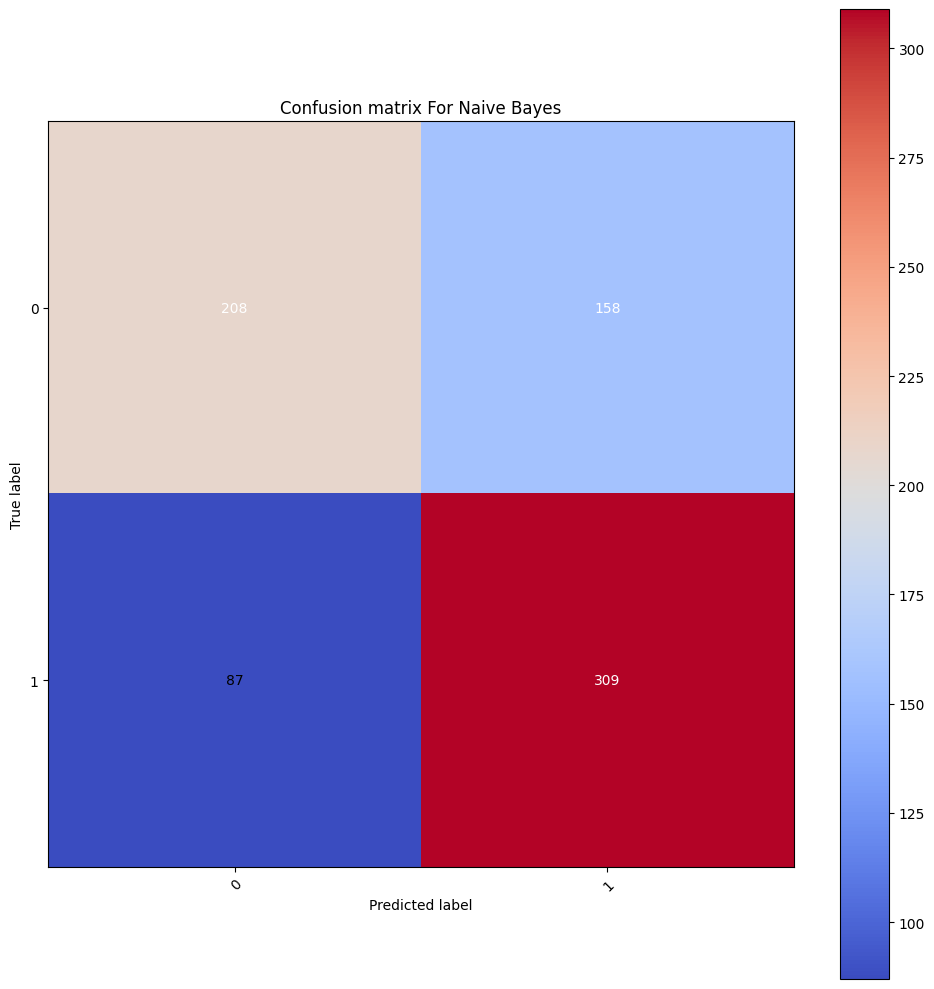

In [34]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

model_mn = build_model(MultinomialNB(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_mn.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For Naive Bayes',
                        # cmap set to coolwarm
                        cmap=plt.cm.coolwarm,
                        
                        
                        )
calculate_results( model_mn.predict(test_sentence),test_label)


Confusion matrix, without normalization
[[251 115]
 [107 289]]


{'accuracy': 70.86614173228347,
 'precision': 0.7091234186884116,
 'recall': 0.7086614173228346,
 'f1': 0.7088143298386045}

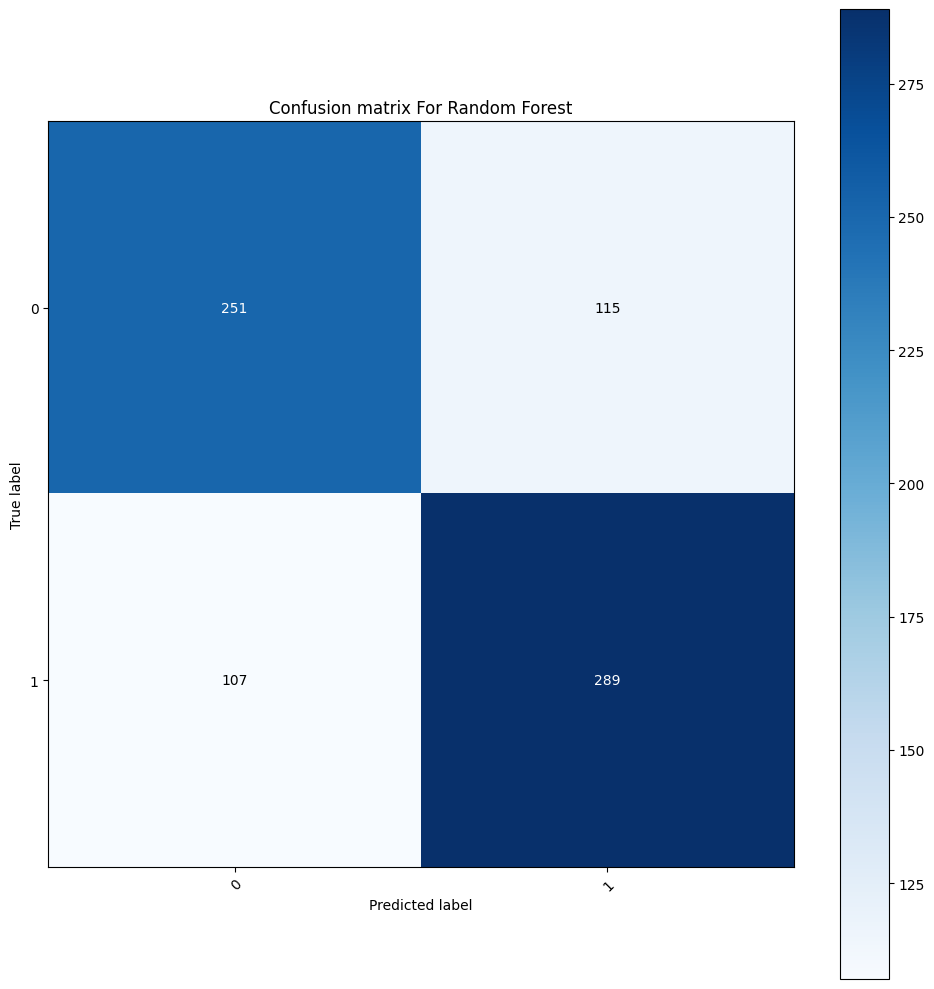

In [35]:

# Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = build_model(RandomForestClassifier(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_rf.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For Random Forest',
                    
                        cmap=plt.cm.Blues

                        )
calculate_results( model_rf.predict(test_sentence),test_label)

Confusion matrix, without normalization
[[230 136]
 [ 92 304]]


{'accuracy': 70.07874015748031,
 'precision': 0.7088287461335093,
 'recall': 0.7007874015748031,
 'f1': 0.7024812305438564}

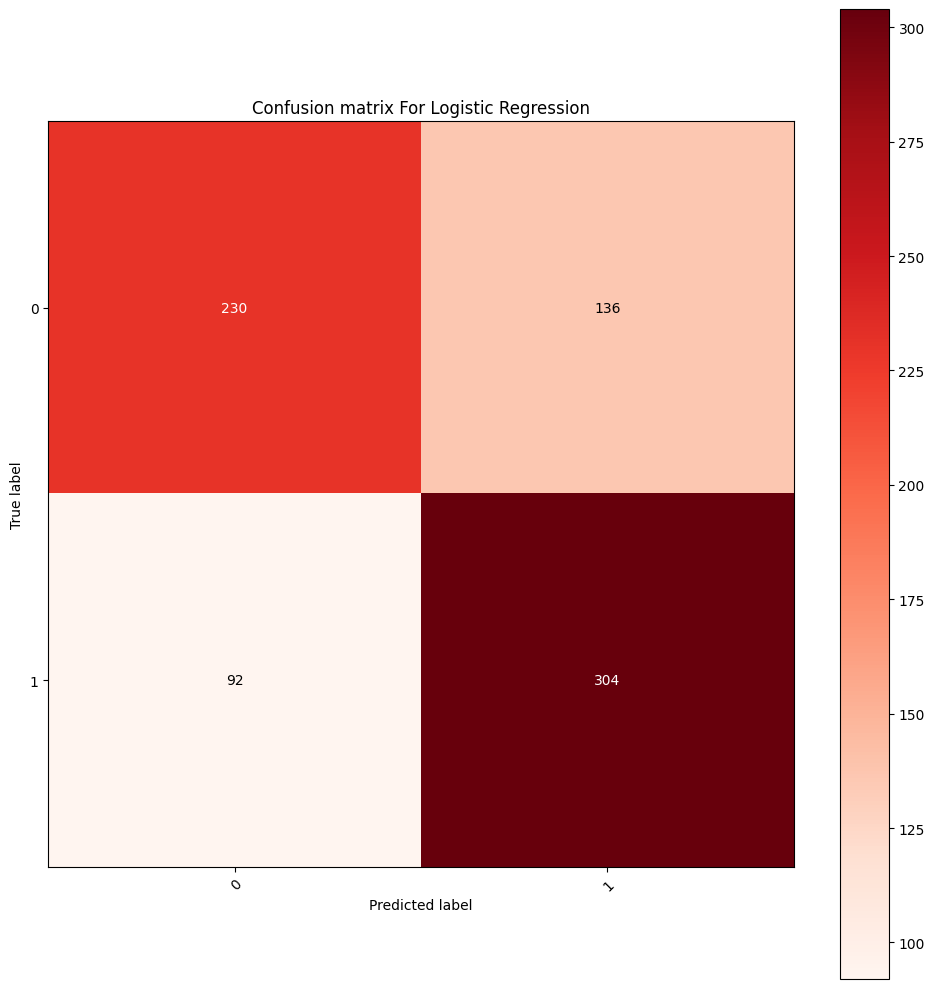

In [37]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_lr = build_model(LogisticRegression(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_lr.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Logistic Regression',
                        
                        
                        # choose random cmap
                        cmap=plt.cm.Reds,
                        
                        )
calculate_results( model_lr.predict(test_sentence),test_label)

                        


Confusion matrix, without normalization
[[239 127]
 [ 88 308]]


{'accuracy': 71.78477690288713,
 'precision': 0.7242337535676893,
 'recall': 0.7178477690288714,
 'f1': 0.7191662167926416}

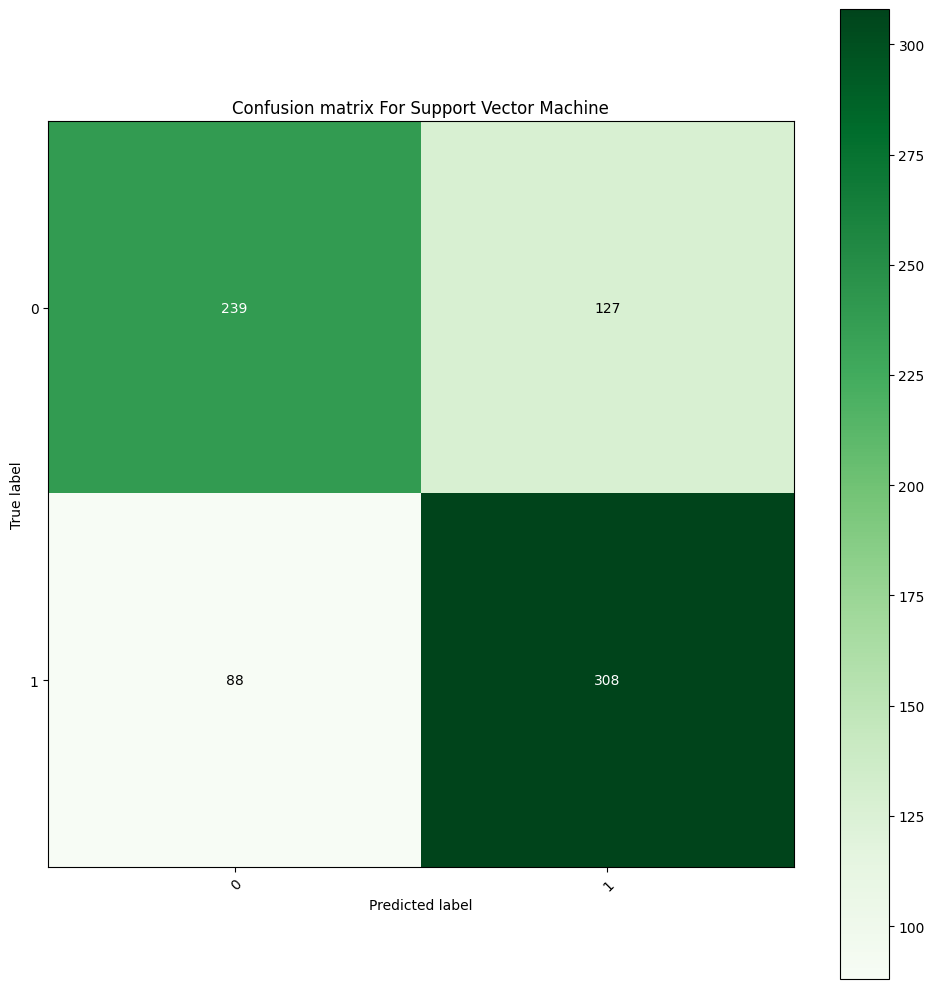

In [36]:
# Support Vector Machine
from sklearn.svm import SVC

model_svm = build_model(SVC(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_svm.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Support Vector Machine',

                        # choose random cmap
                        cmap=plt.cm.Greens,

                        )
calculate_results( model_svm.predict(test_sentence),test_label)



Confusion matrix, without normalization
[[244 122]
 [129 267]]


{'accuracy': 67.06036745406824,
 'precision': 0.6705340809671517,
 'recall': 0.6706036745406824,
 'f1': 0.6705122567900659}

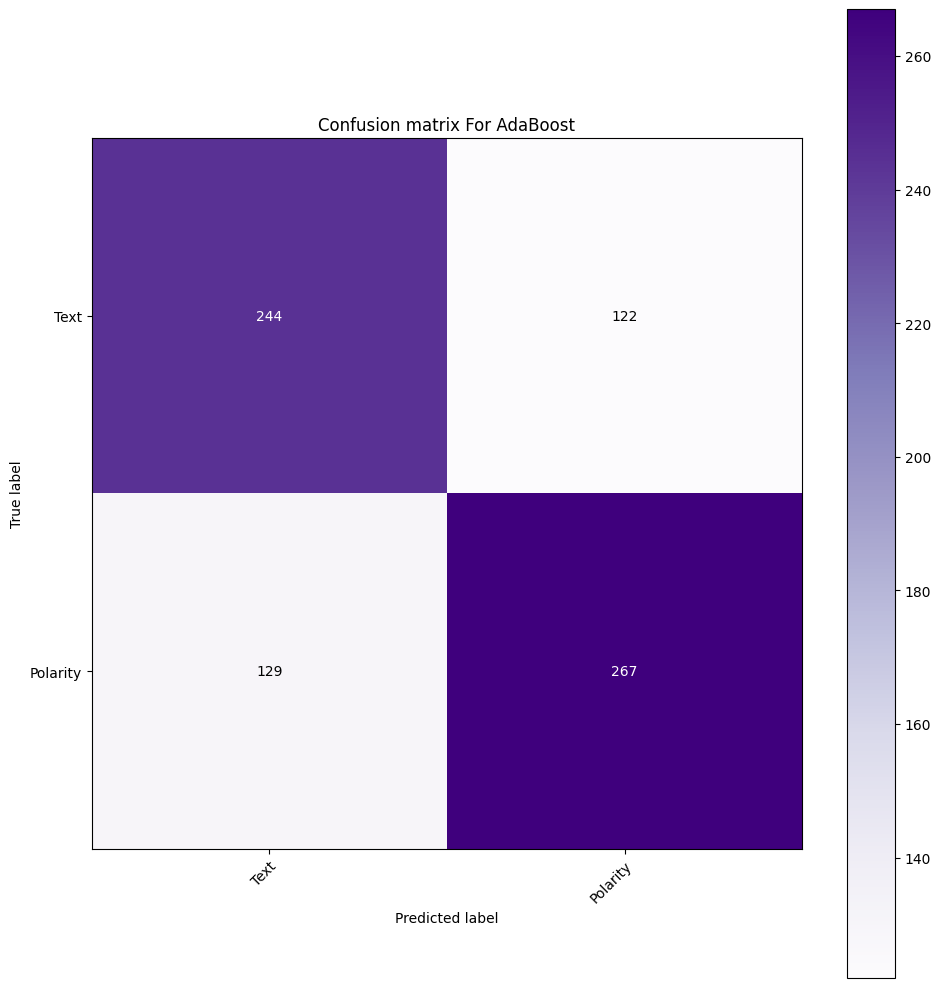

In [ ]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

model_ada = build_model(AdaBoostClassifier(), train_sentence, train_label)
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_label, model_ada.predict(test_sentence), classes=np.array(['Text', 'Polarity']),
                        title='Confusion matrix For AdaBoost',
                        # choose random cmap
                        cmap=plt.cm.Purples,
                       
                        )
calculate_results( model_ada.predict(test_sentence),test_label)


Confusion matrix, without normalization
[[214 152]
 [ 97 299]]


{'accuracy': 67.32283464566929,
 'precision': 0.6855240260268013,
 'recall': 0.6732283464566929,
 'f1': 0.6758924672484962}

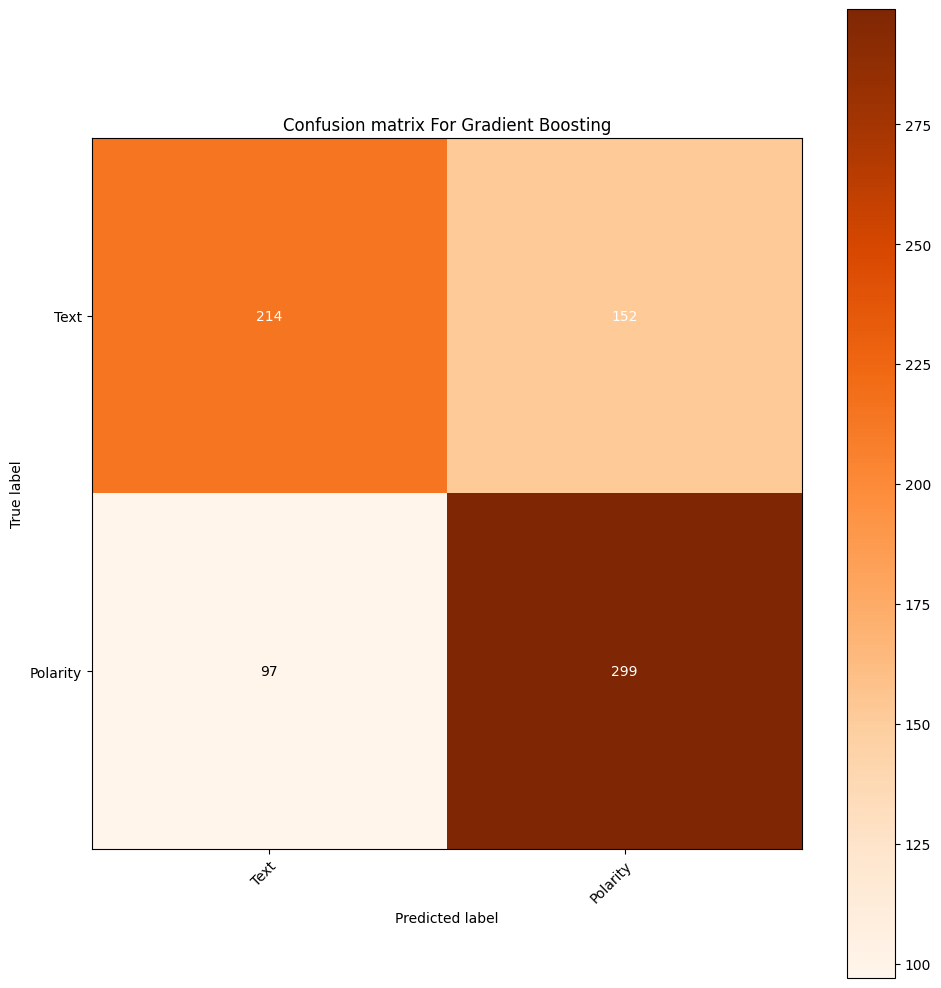

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model_gb = build_model(GradientBoostingClassifier(), train_sentence, train_label)

# Plot non-normalized confusion matrix

plot_confusion_matrix(test_label, model_gb.predict(test_sentence), classes=np.array(['Text', 'Polarity']),

                        title='Confusion matrix For Gradient Boosting',

                        # choose random cmap

                        cmap=plt.cm.Oranges,

                        )

calculate_results( model_gb.predict(test_sentence),test_label)






In [ ]:
# save model
save_model(model_lr, 'model_lr')
save_model(model_rf, 'model_rf')
save_model(model_svm, 'model_svm')
save_model(model_mn, 'model_mn')